## EXPLORATORY DATA  ANALYSIS ON NETFIX DATASET

### 1. Data Preparation

For the preparations lets first import the necessary libraries and load the file needed for our EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("C:\\Users\\ishit\\Downloads\\archive (7)\\netflix_titles.csv")

In [3]:
#It shows the first five rows of the data
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The third and final step in the data preparation stage is to look for missing values. Missing values under different columns can add an unwanted skewness to their distribution, making it complicated to analyze. It is always a good practice to filter such values at the very beginning.

In [5]:
data.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

### Plotting the percentage share of missing values for each column in the entire data

<AxesSubplot:>

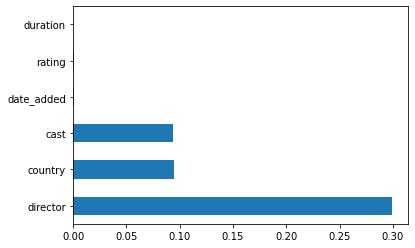

In [6]:
missing_percentages=data.isnull().sum().sort_values(ascending=False)/len(data)
missing_percentages[missing_percentages!=0].plot(kind='barh')

Most of the Values are Missing From Director Column and some of in Cast,Country columms and very few in date, rating andduration column

### Handling missing values

In [7]:
data['director'] = data['director'].fillna('Unknown')
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['cast'] = data['cast'].fillna('Unknown')
data['date_added'] = data['date_added'].fillna(data['date_added'].mode()[0])
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])
data['duration'] = data['duration'].fillna(data['duration'].mode()[0])
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Duplicate values

In [8]:
data.duplicated().sum()

0

There are no duplicate values

In [10]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### 2. EDA and Data visualization

Once the data is cleaned and prepped for analysis, we take some of the columns and apply statistical methods to see the underlying picture come to the surface. The following columns have been analyzed in this project- type, country, date added, release year, duration, listed in and directors.

#### Distribution of content

In [11]:
data.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

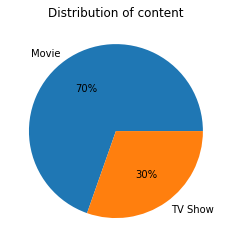

In [12]:
# Lets plot the distribution of content
plt.pie(list(data.type.value_counts()),labels=list(data.type.value_counts().keys()),autopct="%0.0f%%")
plt.title('Distribution of content')
plt.show()

So there are more movies than tv shows. 70% content is Movies and 30% Content is Tv-shows.

#### Top 10 countries by the movies and tv shows

In [13]:
data.country.value_counts()

United States                             3649
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

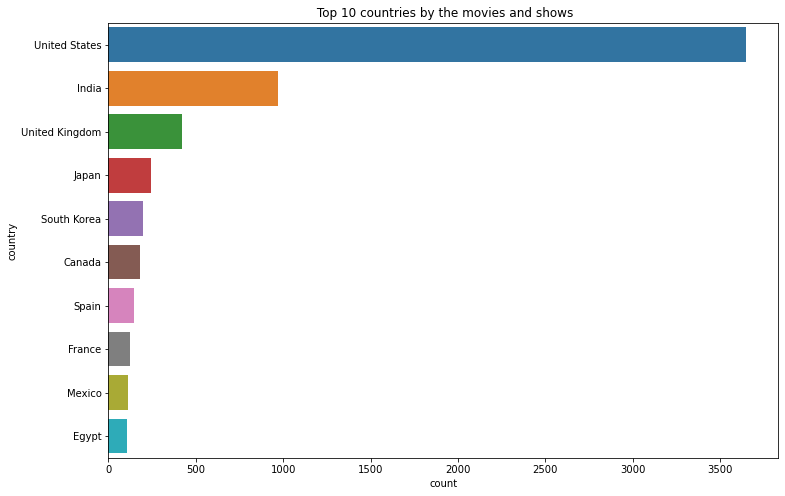

In [14]:
# Lets plot the graph of movies and shows country wise
plt.figure(figsize=(12,8))
sns.countplot(y="country", data=data, order = data.country.value_counts()[:10].index)
plt.title(" Top 10 countries by the movies and shows")
plt.show()

Therefore most of the movie and tv shows is from united states followed by India and then United Kingdom

#### Top 10 countries by  movies

In [15]:
data_movie=data[data.type=="Movie"]

In [16]:
data_country_movies=data_movie.country.value_counts()

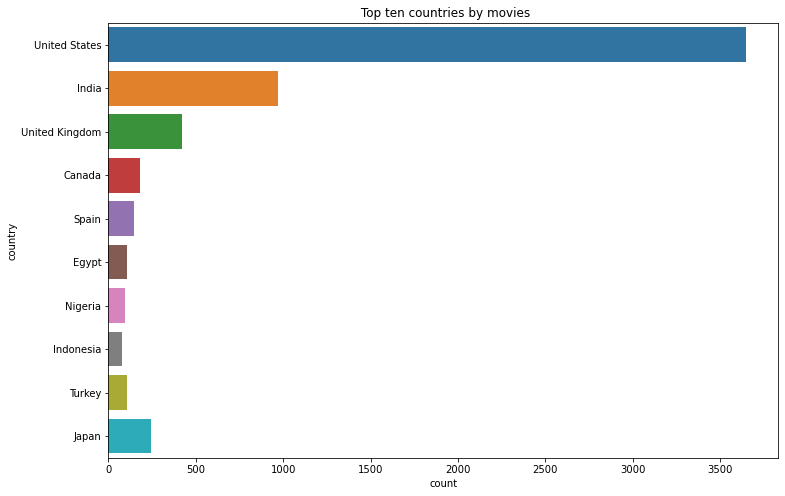

In [17]:
# Plot the graph of movies country-wise
plt.figure(figsize=(12,8))
sns.countplot(y="country", data=data, order = data_country_movies[:10].index)
plt.title(" Top ten countries by movies")
plt.show()

The country with maximum movie is united states, followed by india and then united kingdom

#### Top ten countries by  shows

In [18]:
data_show=data[data["type"]=="TV Show"]

In [19]:
data_country_show=data_show.country.value_counts()

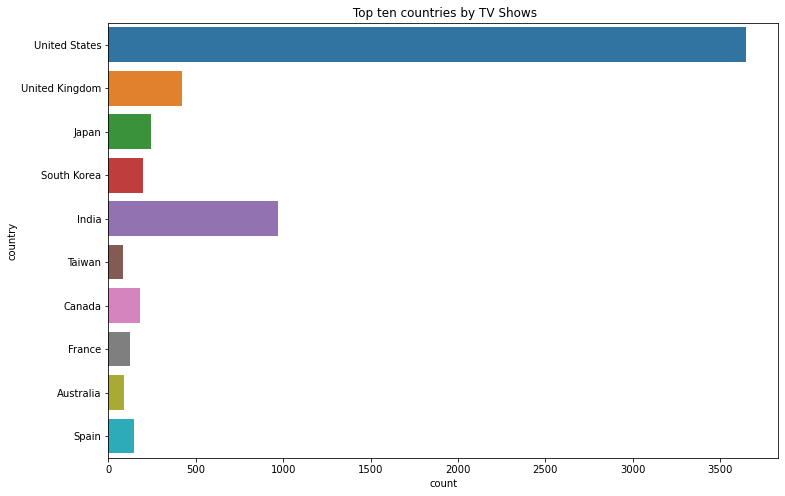

In [20]:
# Lets plot the graph of movies country-wise
plt.figure(figsize=(12,8))
sns.countplot(y="country", data=data, order = data_country_show[:10].index)
plt.title(" Top ten countries by TV Shows")
plt.show()

The country with maximum tv shows is united states, followed by united kingdom and then japan. Here India is at 5th position. In movies it is at 2nd position.

#### Movies and Tv Shows by Release Year

In [21]:
data_release_year=data.release_year.value_counts()

In [22]:
data_release_year

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

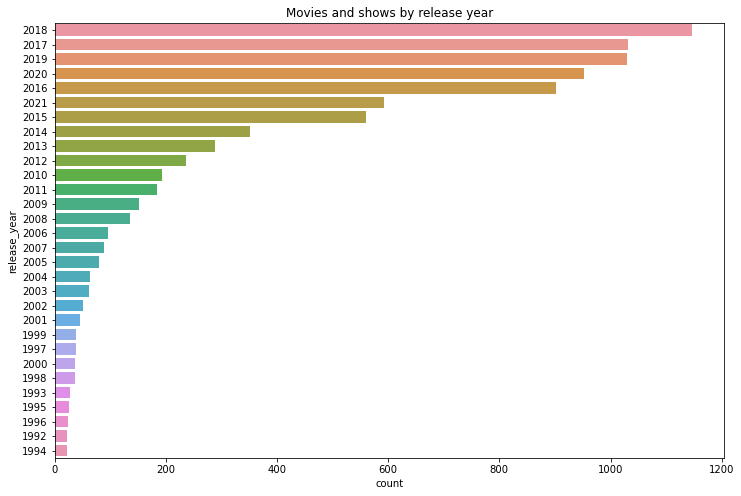

In [23]:
# Graph of movie and tv shows by release year.
plt.figure(figsize=(12,8))
sns.countplot(y="release_year", data=data, order = data_release_year[:30].index)
plt.title("Movies and shows by release year")
plt.show()

Year 2018 marked the highest number of movie and tv show release followed by 2017 and then 2019

####  Rating of movies and tv shows

In [24]:
data_rating=data.rating.value_counts()

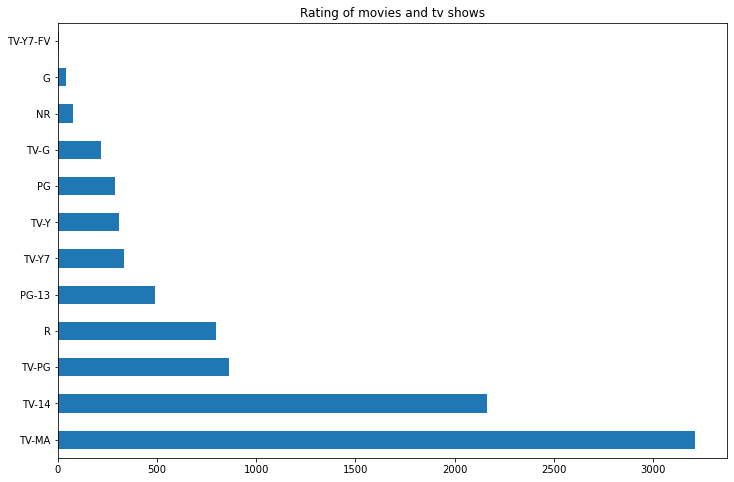

In [25]:
# Graph of rating of movies and shows.
plt.figure(figsize=(12,8))
data_rating[:12].plot(kind="barh")
plt.title("Rating of movies and tv shows")
plt.show()

We can see that TV-MA is the highest means most of the tv shows are for adults (18+)

####  Duration of movies

In [26]:
data_duration_movies=data_movie.duration.value_counts()

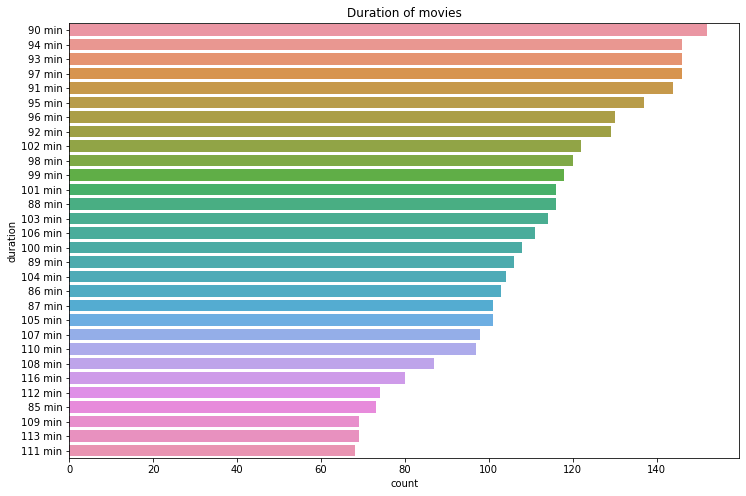

In [27]:
# Lets plot the duration of movies
plt.figure(figsize=(12,8))
sns.countplot(y="duration", data=data, order =data_duration_movies[:30].index)
plt.title("Duration of movies")
plt.show()

Therefore duration of most movies are in the range of 90 to 100 minutes

#### Duration of Tv Shows

In [28]:
data_series_duration=data_show.duration.value_counts()

In [29]:
data_series_duration

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

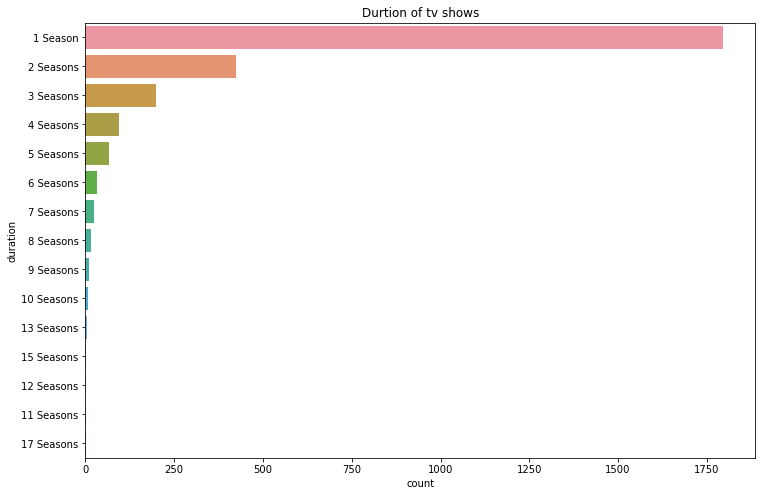

In [30]:
# Lets plot the duration of movies
plt.figure(figsize=(12,8))
sns.countplot(y="duration", data=data, order =data_series_duration.index)
plt.title("Durtion of tv shows")
plt.show()

We can conclude that maximum Tv shows have only season 1.

#### Top 10 Genre

In [31]:
data_listed_in=data.listed_in.value_counts()

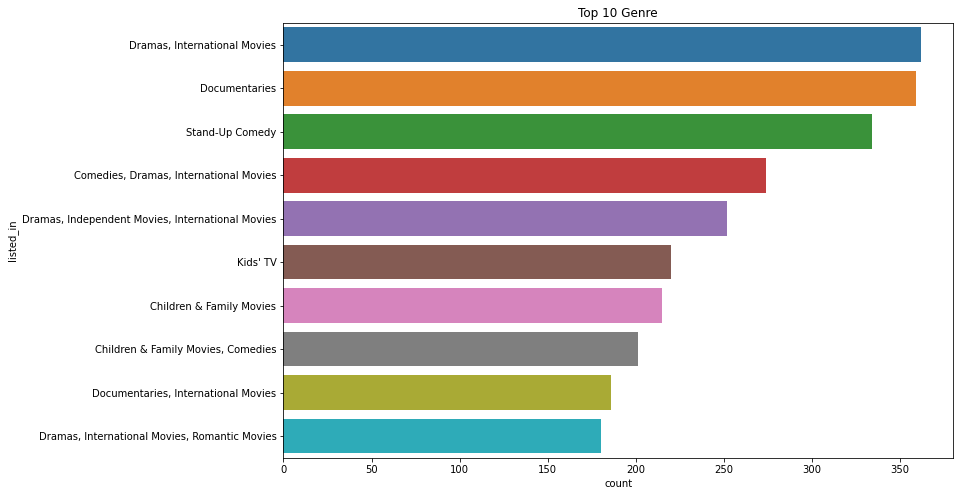

In [32]:
# Lets Plot Top 10 Genre
plt.figure(figsize=(12,8))
sns.countplot(y="listed_in", data=data, order =data_listed_in[:10].index)
plt.title("Top 10 Genre")
plt.show()

Dramas, International movies is the highest followed by Documentaries.

#### Movies and Tv Shows by Date Added on Netflix

In [33]:
data_time=pd.to_datetime(data.date_added)

In [34]:
data_date_added=data_time.dt.year.value_counts()

In [35]:
data_date_added

2019    2016
2020    1889
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: date_added, dtype: int64

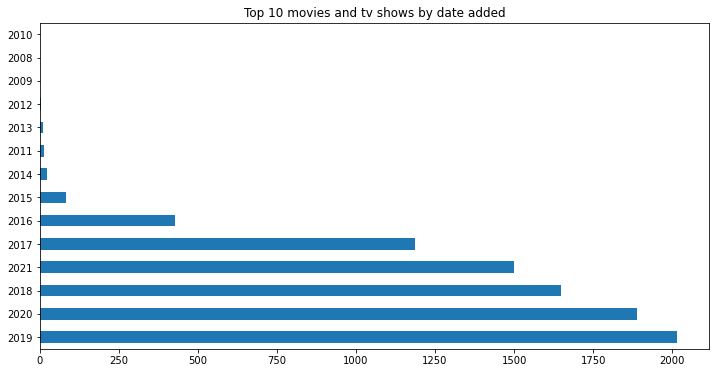

In [36]:
# Movies and tv shows by date added on netflix
plt.figure(figsize=(12,6))
data_date_added.plot(kind="barh")
plt.title("Top 10 movies and tv shows by date added")
plt.show()

So we can see that most of the movies and tv shows were added in 2019 Then it decreases may be because of Corona:

#### Distribution of content over year

In [37]:
data["date_added"]=pd.DatetimeIndex(data["date_added"]).year

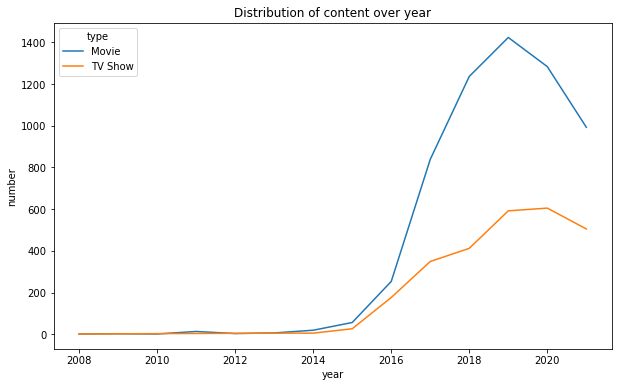

In [38]:
new=data[["type","date_added"]].value_counts().reset_index()
new.columns=["type","year","number"]
new
plt.figure(figsize=(10,6))
sns.lineplot(data=new,x="year",y="number",hue="type")
plt.title("Distribution of content over year")
plt.show()

We can see that movies are added more as compared to tv shows over the year

#### Top 10 Directors

In [39]:
data_director=data.director.value_counts()

In [40]:
data_director

Unknown                           2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64

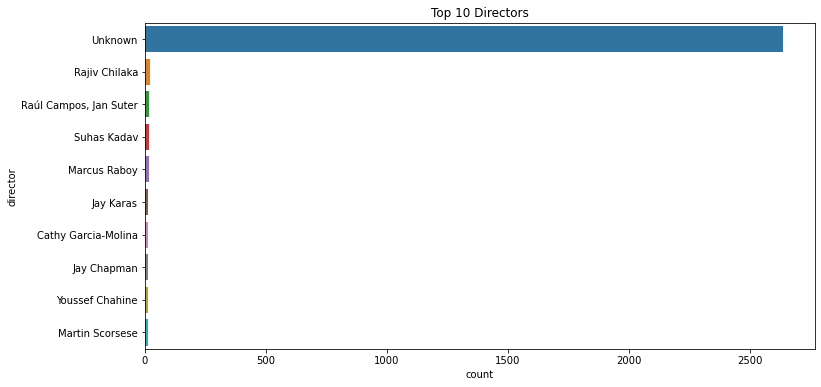

In [41]:
# Lets plot the graph of top 10 directors
plt.figure(figsize=(12,6))
sns.countplot(y="director",data=data, order=data_director[:10].index)
plt.title("Top 10 Directors")
plt.show()

### 3. Conclusion

 1.There are some missing values in director, cast and country column.
 
 2.United States has the most number of tv shows and movies followed by india and united kingdom
 
 3.There are more movies than tv shows. 70% content is Movies and 30% Content is Tv-shows.
 
 4.Most of the movies and tv shows are for adults (18+)
 
 5.Year 2018 marked the highest number of movies and tv shows release.Then it decreased may be because of Corona:
 
 6.Duration of most movies are in the range of 90 to 100 minutes
 
 7.Dramas,international movies is the most prefered genre followed by Documentaries.